In [221]:
import torch
import torch.nn as nn 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [222]:
pd.set_option('display.max_rows', 10)



In [191]:
print(dataset)


    MIN  BAT
0     0    5
1     4   10
2     8   14
3    12   19
4    16   24
..  ...  ...
8    32   42
9    36   47
10   40   52
11   44   56
12   48   61

[13 rows x 2 columns]


In [223]:
X_train = df.iloc[:,0].values
y_train = df.iloc[:,-1].values

In [224]:
df.head(13)

,MIN,BAT
0,0,5
1,4,10
2,8,14
3,12,19
4,16,24
...,...,...
8,32,42
9,36,47
10,40,52
11,44,56


In [225]:
#sns.scatterplot(df['MIN'], df['BAT'])

In [226]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   MIN     13 non-null     int64
 1   BAT     13 non-null     int64
dtypes: int64(2)
memory usage: 336.0 bytes


In [227]:
sc = MinMaxScaler()
sct = MinMaxScaler()
X_train=sc.fit_transform(X_train.reshape(-1,1))
y_train =sct.fit_transform(y_train.reshape(-1,1))

In [228]:
X_train = torch.from_numpy(X_train.astype(np.float32)).view(-1,1)
y_train = torch.from_numpy(y_train.astype(np.float32)).view(-1,1)

In [229]:
input_size = 1
output_size = 1

In [250]:
class LinearRegressionModel(torch.nn.Module):

    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [251]:
model = nn.Linear(input_size , output_size)


In [257]:
learning_rate = 0.1
l = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr =learning_rate )

In [258]:
num_epochs = 200
for epoch in range(num_epochs): 
    y_pred = model(X_train.requires_grad_())
    loss= l(y_pred, y_train)
    loss.backward()  
    optimizer.step()
    optimizer.zero_grad() 
    print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 0, loss 0.0573054775595665
epoch 1, loss 0.044387008994817734
epoch 2, loss 0.03444264829158783
epoch 3, loss 0.026545466855168343
epoch 4, loss 0.017356235533952713
epoch 5, loss 0.010193501599133015
epoch 6, loss 0.006188258528709412
epoch 7, loss 0.0036328486166894436
epoch 8, loss 0.001247840584255755
epoch 9, loss 5.1923874707426876e-05
epoch 10, loss 0.0005882915575057268
epoch 11, loss 0.0016625776188448071
epoch 12, loss 0.002307957736775279
epoch 13, loss 0.002949571004137397
epoch 14, loss 0.004064391832798719
epoch 15, loss 0.005068897735327482
epoch 16, loss 0.005329765845090151
epoch 17, loss 0.005126986186951399
epoch 18, loss 0.0049390243366360664
epoch 19, loss 0.00467617716640234
epoch 20, loss 0.004018748179078102
epoch 21, loss 0.0030893299262970686
epoch 22, loss 0.0022938919719308615
epoch 23, loss 0.0017227634089067578
epoch 24, loss 0.001160512212663889
epoch 25, loss 0.0005804915563203394
epoch 26, loss 0.00020987525931559503
epoch 27, loss 0.0001291811058

In [259]:
predicted = model(X_train).detach().numpy()
print(predicted)

[[7.7552733e-04]
 [8.3979338e-02]
 [1.6718315e-01]
 [2.5038695e-01]
 [3.3359075e-01]
 [4.1679454e-01]
 [4.9999836e-01]
 [5.8320212e-01]
 [6.6640598e-01]
 [7.4960977e-01]
 [8.3281356e-01]
 [9.1601741e-01]
 [9.9922121e-01]]


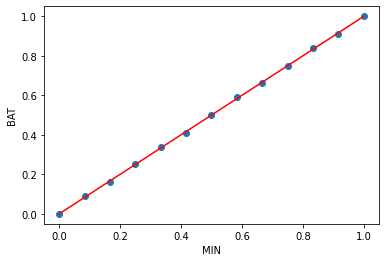

In [260]:
plt.scatter(X_train.detach().numpy()[:] , y_train.detach().numpy()[:])
plt.plot(X_train.detach().numpy()[:100] , predicted[:100] , "red")
plt.xlabel("MIN")
plt.ylabel("BAT")
plt.show()

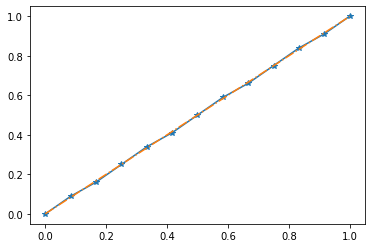

In [261]:
plt.plot(X_train.detach().numpy(), y_train.detach().numpy() , '-*',X_train.detach().numpy(), model(X_train).detach().numpy(),'-.')